<a href="https://colab.research.google.com/github/GilSasson/ai/blob/main/linear_boston_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning Linear Regression using TensorFlow from the Boston dataset.  Code adopted from: 

https://medium.com/@emresancakli4/boston-housing-prices-project-for-non-logistic-regression-e94546fae58 

In [ ]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import numpy as np
boston = load_boston()
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
import pandas as pd
dataset_x = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset_y = boston.target   
print(dataset_x.head())
print(dataset_y)

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 2

Now let's split the data into training and testing. Note that no cross validation is done here.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size = 0.20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

(404, 13)
(102, 13)
(404,)
(102,)
[13.  15.  50.  24.8 23.2 23.7 23.5 20.  16.  18.4 20.8 11.7 26.4 19.1
 29.8 21.4 13.9 22.  23.8 14.5 13.8 32.7 18.5 45.4 22.8 36.2 18.9 50.
 20.  17.4 20.1 21.5 20.3 18.7 16.8 13.6 11.8 21.2 50.  24.3  8.3 37.2
 27.5 17.4 32.5 18.8 21.9 28.4 18.6 24.4 19.5 15.  31.7  5.6 21.1 22.
 23.6 13.5 12.7 22.8 12.3 17.8 20.1  9.5 23.  20.  23.8 22.5 15.6 31.5
 30.1 41.3 13.6 23.7 14.9  8.4 23.2 12.8 35.1 11.9 48.3 41.7 17.9 50.
 19.9 23.9 10.4 17.8 24.4 25.3 20.5 19.5 13.1  5.  16.6 15.  33.3 21.9
 13.4 16.5 12.5 14.  23.7 22.9 23.1 14.1 24.8 27.9 23.4 30.8  8.5 22.9
 14.6 21.7 26.7 14.2  7.5 19.4 18.5 22.6 50.  22.6 15.4  8.5 20.9 29.8
 21.7 17.5 25.  46.  50.  20.3 44.  10.9 25.  22.9 25.2 23.  21.2 12.7
 22.6 22.   8.3 19.8 46.7 21.8 22.2 19.7 20.9 44.8 27.1 50.  23.1 24.3
 19.9  5.  14.6 13.1 30.7 18.5 20.6 43.8 35.2 22.2  8.8 20.8 20.4 21.7
 16.1  8.7 17.1 34.9 16.2 31.5 50.  15.6 13.4 22.2 20.6 43.1 18.9 18.8
 32.2  8.4 31.1 19.1 15.6 14.9 33.2 12.1 17.2 

Let's standardize the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

Now let's cheat and use TensorFlow!
We will ignore why Relu is used in earlier layers, but if you want to read more about this look at:
https://stackoverflow.com/questions/51442459/why-is-relu-used-in-regression-with-neural-networks. You can read up more about this on the source of the workbook as well. Here is their graphic about what is happening
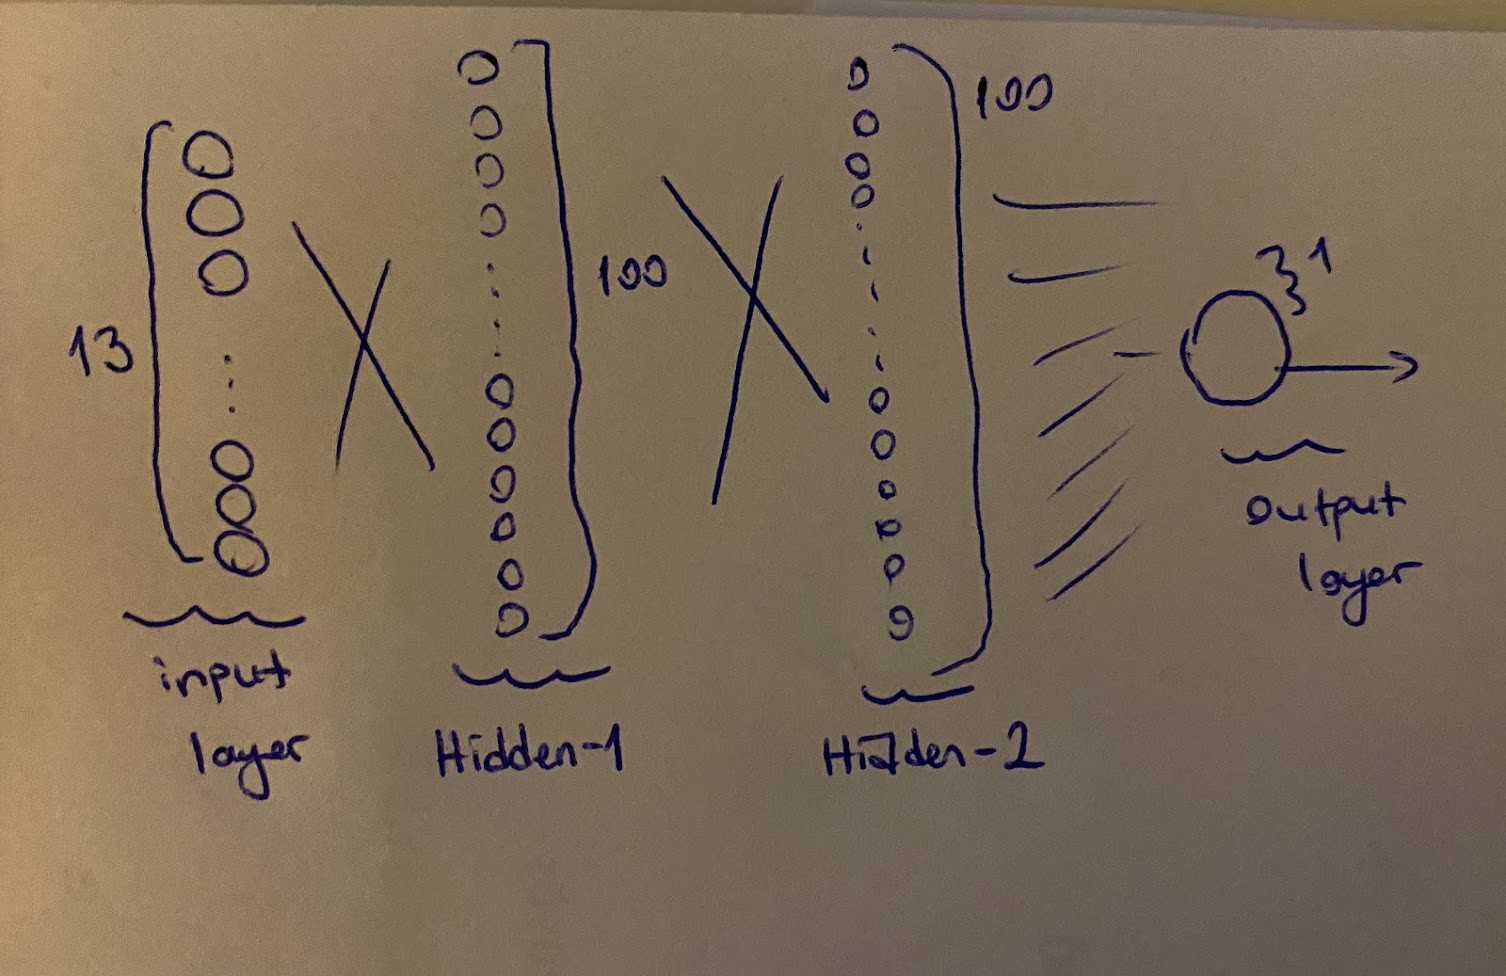 


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential(name='')
model.add(Dense(100, input_dim = 13, activation='relu', name='Hidden-1'))
model.add(Dense(100, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='linear', name='Output')) #Notice how only the last layer is linear!

Now we "compile" the model.

In [ ]:
model.compile(loss='mse', metrics=['mse'])

In [ ]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)


Epoch 1/100
11/11 [==============================] - 1s 15ms/step - loss: 582.4924 - mse: 582.4924 - val_loss: 456.3917 - val_mse: 456.3917
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 487.6570 - mse: 487.6570 - val_loss: 346.2156 - val_mse: 346.2156
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 370.0864 - mse: 370.0864 - val_loss: 233.0003 - val_mse: 233.0003
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 256.0533 - mse: 256.0533 - val_loss: 148.9505 - val_mse: 148.9505
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 180.0258 - mse: 180.0258 - val_loss: 111.2921 - val_mse: 111.2921
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 144.0000 - mse: 144.0000 - val_loss: 93.0351 - val_mse: 93.0351
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 122.4256 - mse: 122.4256 - val_loss: 80.7628 - val_mse: 80.7628
Epoch 8/100
11/11 [===========

Now let's print a nice graph showing the error rate going down (hopefully)

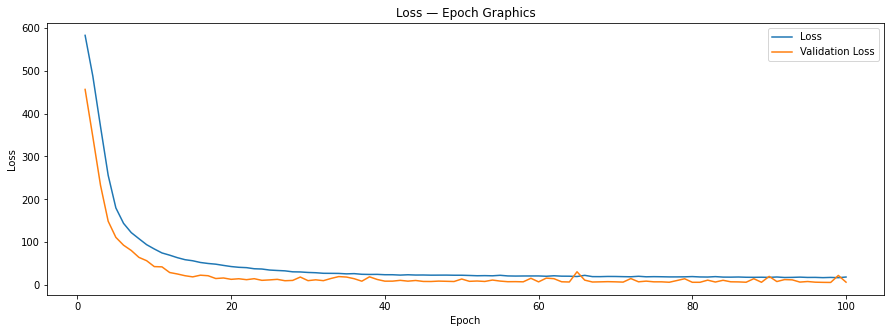

In [ ]:
import matplotlib.pyplot as plt
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

How well did we do?  Well we can check it on the data:

In [ ]:
t = model.predict(X_test)
t=np.asarray(t).ravel() #puts the data in a 1-dimentional array
t.shape

(102,)

In [ ]:
pred_df = pd.DataFrame(
    {
        'Actual Value' : y_test, 
     'Predicted Values' : t,
    }
)
print(pred_df.head(10))

   Actual Value  Predicted Values
0          23.4         23.683088
1          19.1         19.886499
2          13.3         18.423876
3          21.4         22.506151
4          19.4         18.651318
5          36.2         25.381683
6          24.3         21.088150
7          21.9         23.313799
8          20.6         20.467329
9          24.8         30.254276


In [ ]:
from sklearn.metrics import mean_squared_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('Mean squared error on test data with sklearn: ', mse_lr)
print('Mean squared error on test data with tensorflow : ', mean_squared_error(y_test, t))

Mean squared error on test data with sklearn:  24.008606492898352
Mean squared error on test data with tensorflow :  15.384856206796142


So I guess this did ok (in fact better on my train / test split)